In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
path = "../data/raw/bank-additional-full.csv"
df = pd.read_csv(path, sep= ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


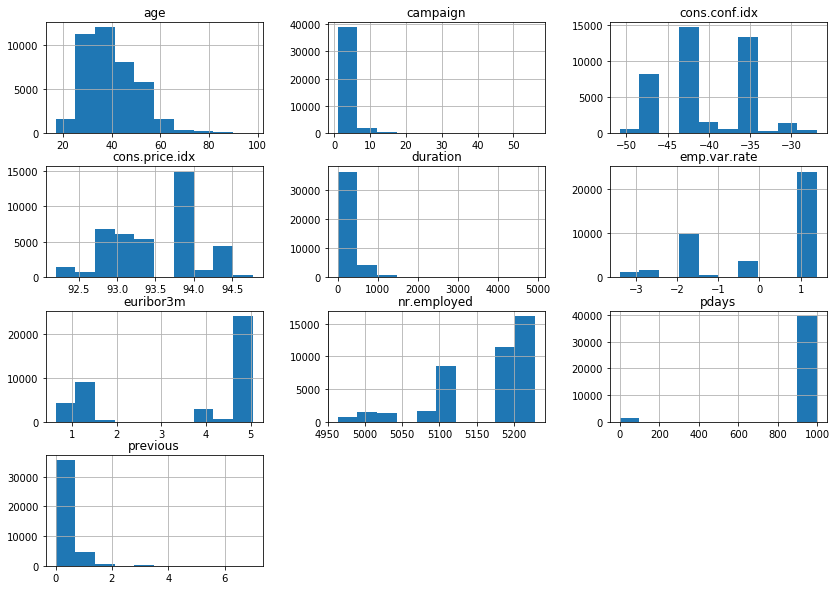

In [8]:
df.hist(bins= 10, figsize=(14, 10))
plt.show()

In [9]:
df.rename(columns={'y':'deposit'}, inplace=True)
monthly_sub = pd.crosstab(df['month'], df['deposit']).apply(lambda x: x/x.sum() * 100)
monthly_sub.sort_values(by='yes', ascending=False)

deposit,no,yes
month,,
may,35.249535,19.094828
aug,15.111634,14.116379
jul,17.853234,13.987069
jun,13.021232,12.047414
apr,5.726716,11.616379
nov,10.082631,8.965517
oct,1.102660,6.788793
mar,0.738755,5.948276
sep,0.859144,5.517241


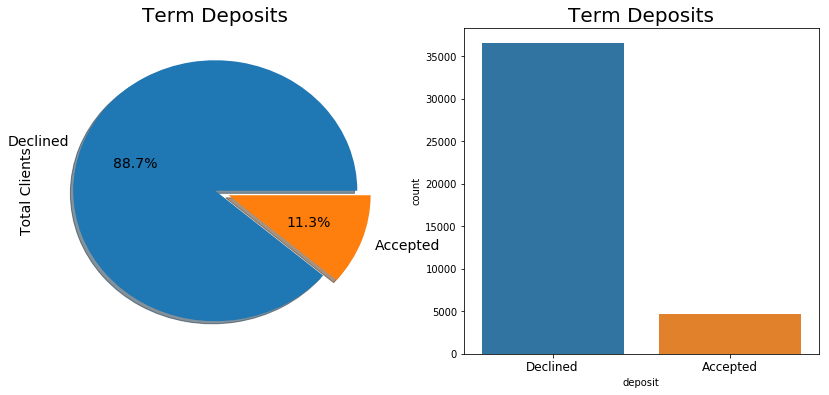

In [10]:
f,ax=plt.subplots(1,2, figsize=(14,6))
labels = 'Declined', 'Accepted'
df['deposit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=14)
ax[0].set_title('Term Deposits', fontsize=20)
ax[0].set_ylabel('Total Clients', fontsize=14)
sns.countplot('deposit',data=df,ax=ax[1])
ax[1].set_title('Term Deposits', fontsize=20)
ax[1].set_xticklabels(['Declined', 'Accepted'], fontsize=12)
plt.show()

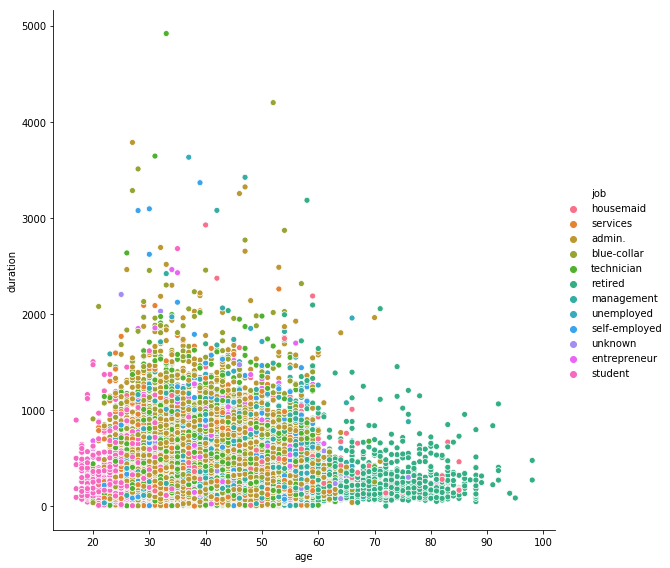

In [11]:
sns.relplot(x="age", y="duration", height= 8, aspect=1, hue="job", data=df)
plt.show()

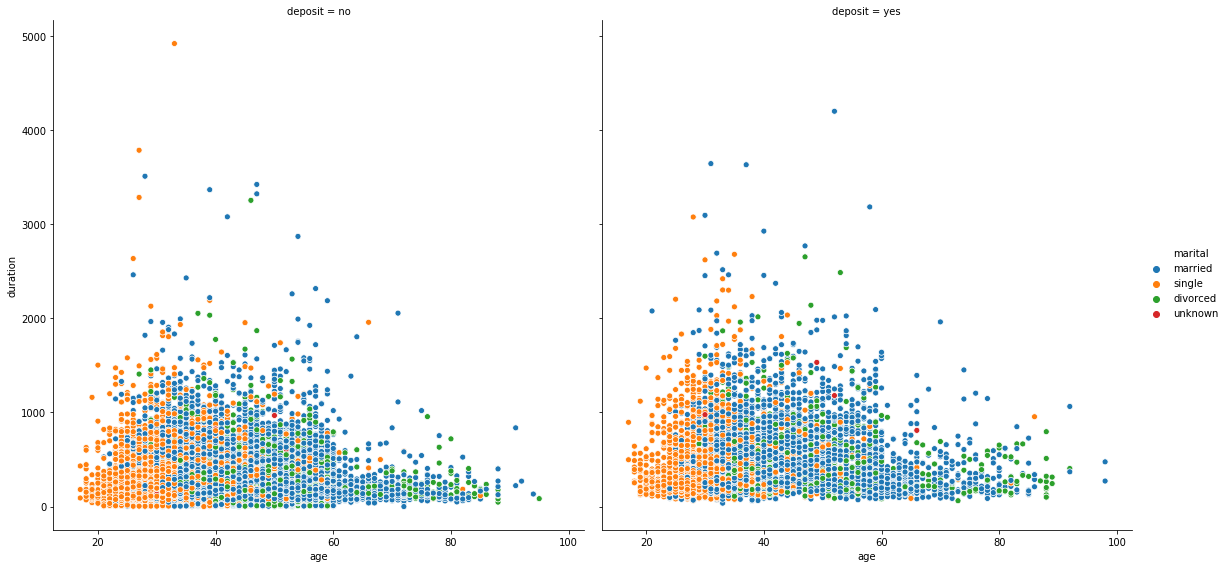

In [12]:
sns.relplot(x="age", y="duration", height= 8, aspect=1, hue="marital", col="deposit", data=df)
plt.show()

In [13]:
X = df.deposit.value_counts()
X

no     36548
yes     4640
Name: deposit, dtype: int64

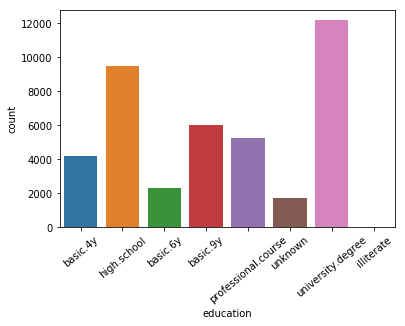

In [14]:
sns.countplot(x="education", data=df)
plt.xticks(rotation = 40)
plt.show()

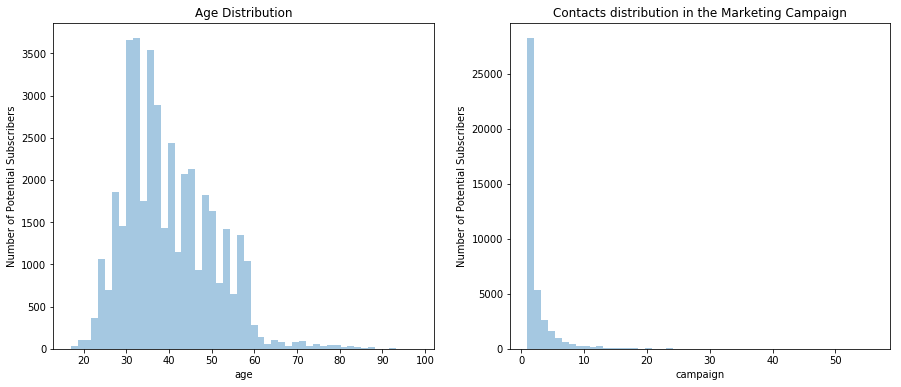

In [15]:
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

sns.distplot(df['age'], kde=False, ax=axes[0]).set_title('Age Distribution')
axes[0].set_ylabel('Number of Potential Subscribers')


sns.distplot(df['campaign'], kde=False, ax=axes[1]).set_title('Contacts distribution in the Marketing Campaign')
axes[1].set_ylabel('Number of Potential Subscribers')

plt.show()

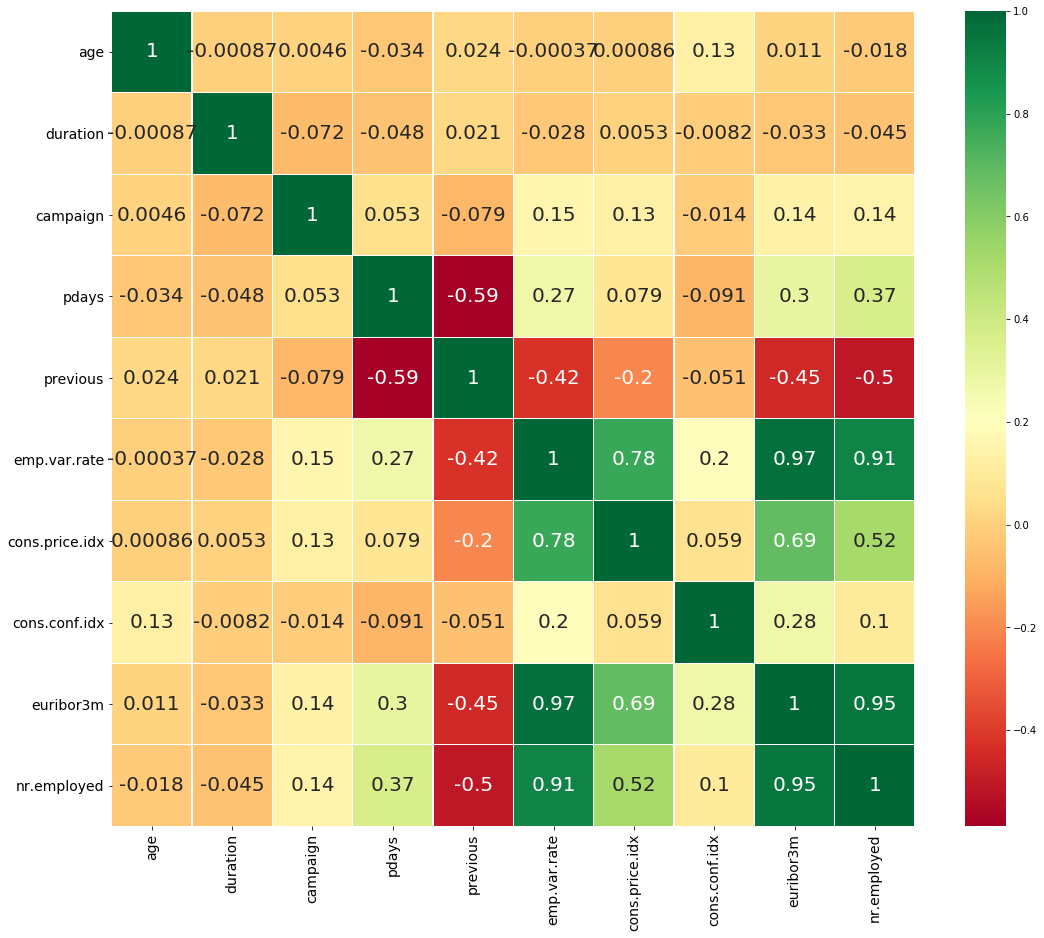

In [16]:
corr = df.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()